In [33]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Датасет** Игрушка дьявола

In [34]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

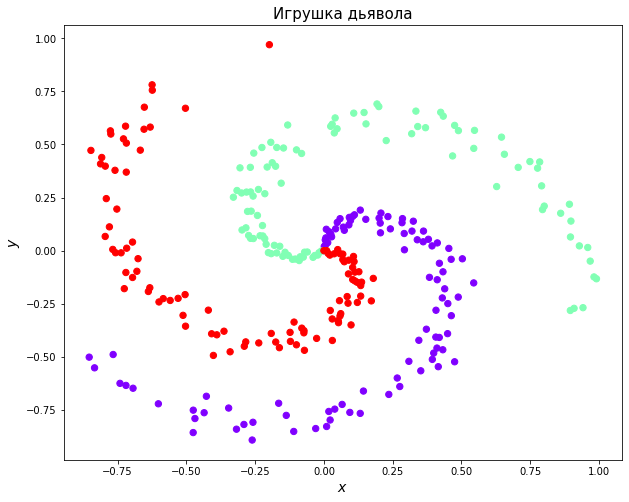

In [35]:
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [36]:
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

Через Sequential

In [37]:
D_in, H, D_out = 2, 100, 3

simple_net = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
    nn.Softmax()
)

С помощью Module

In [38]:
class MyModule(nn.Module):

  def __init__(self):
    super().__init__()
    self.f_lin = nn.Linear(D_in, H)
    self.s_lin = nn.Linear(H, D_out)

  def forward(self, X):
    X = F.relu(self.f_lin(X))
    return F.softmax(self.s_lin(X))

model = MyModule()
optim = Adam(model.parameters(), 1e-1)
criterion = nn.CrossEntropyLoss()

cuda:0


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Iterations')

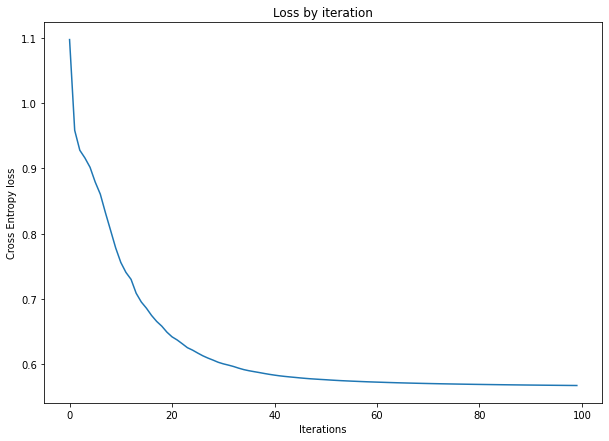

In [39]:
from tqdm.notebook import tqdm, trange

losses_history = []
epochs = 100
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)
model.to(device)

for i in trange(epochs):
  y_pred = model(X.to(device))

  loss = criterion(y_pred, y.to(device))
  losses_history.append(loss.item())
  
  optim.zero_grad()
  loss.backward()
  optim.step()
 

plt.figure(figsize=(10,7))

plt.plot(losses_history)
plt.title("Loss by iteration")
plt.ylabel("Cross Entropy loss")
plt.xlabel("Iterations")